# Convolutional Neural Networks (CNNs) are a type of deep learning model commonly used for image and object recognition tasks. They are composed of several layers, including convolutional layers, pooling layers, and fully connected layers.

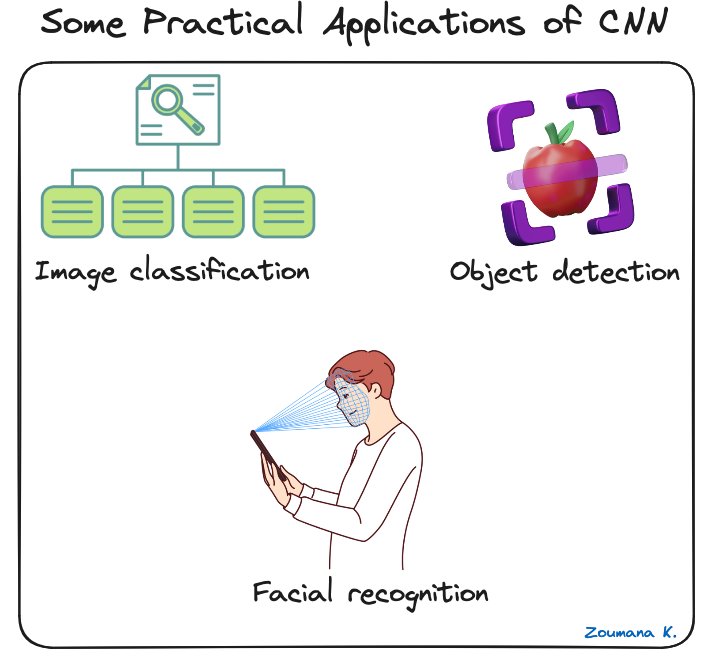

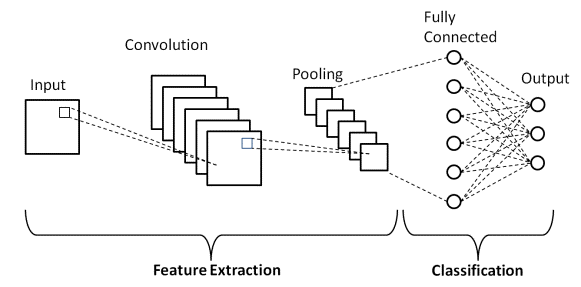

#Deep Learning Frameworks for CNNs


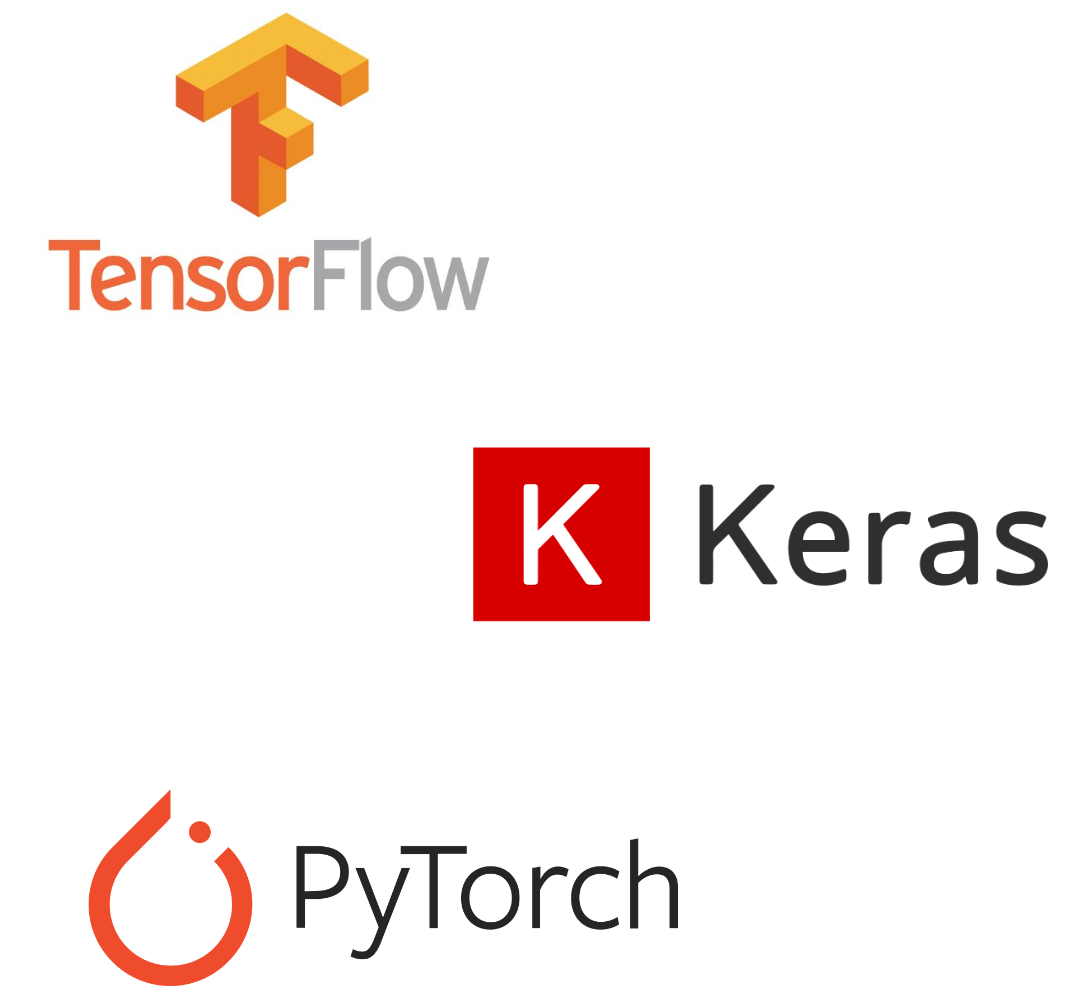

#1. TensorFlow

TensorFlow, developed by Google Brain, is an open-source deep learning framework that provides a flexible platform for building machine learning models. TensorFlow supports both low-level operations and high-level APIs.

#2. PyTorch

PyTorch, developed by Facebook's AI Research lab (FAIR), is an open-source deep learning framework known for its flexibility and ease of use. It uses dynamic computation graphs, which makes it highly intuitive for researchers and developers.

#3. Keras

Keras is an open-source deep learning framework that provides a high-level API for building and training deep learning models. Keras is user-friendly and modular, and it runs on top of TensorFlow.

#Convolutional Layers:

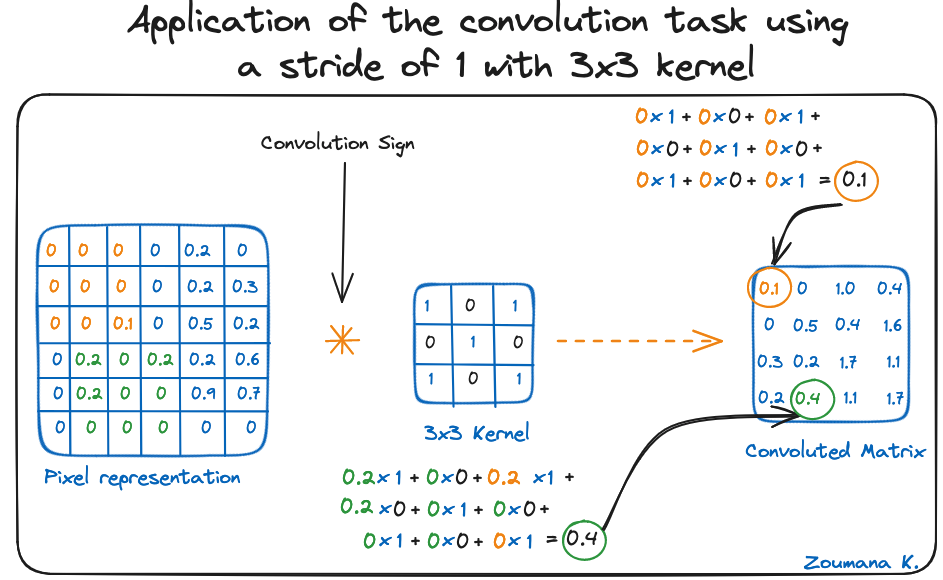

# Pooling layer
The goal of the pooling layer is to pull the most significant features from the convoluted matrix.

 reduce the dimension of the feature map (convoluted matrix), hence reducing the memory used while training the network

#Type

Max pooling, which is the maximum value of the feature map

Sum pooling corresponds to the sum of all the values of the feature map

Average pooling is the average of all the values.

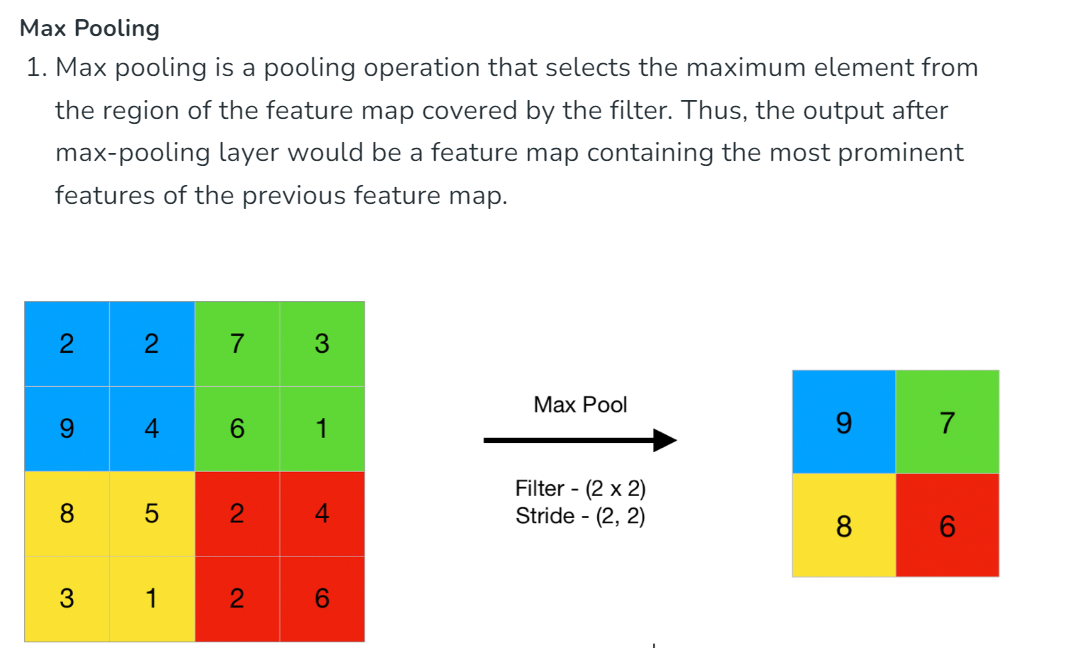

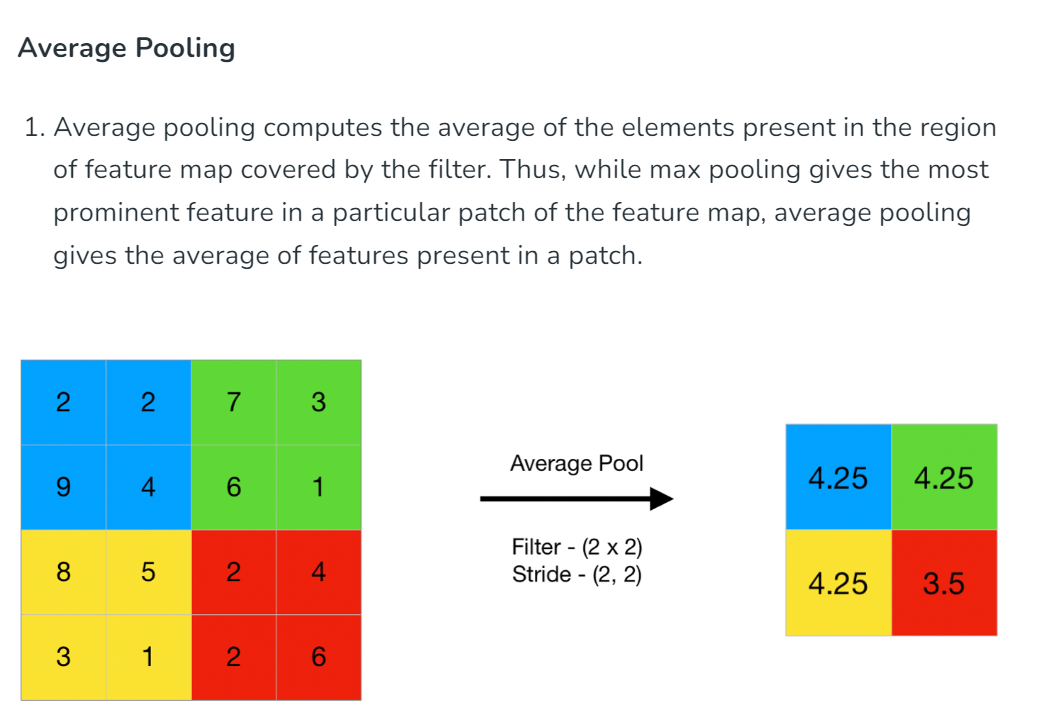


#Sum pooling
is a type of pooling that takes the sum of each region in the feature map

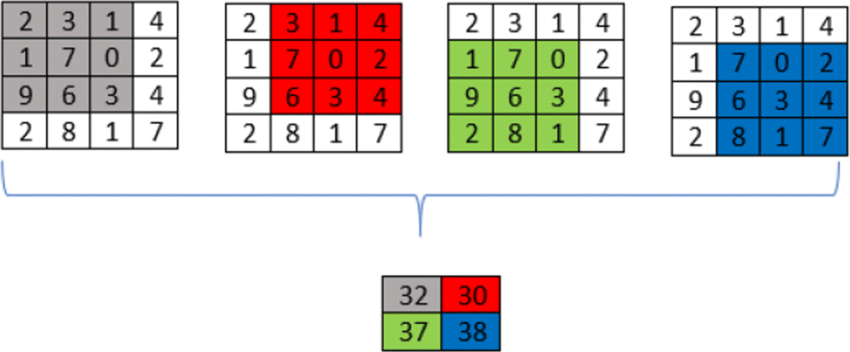

#Fully connected layers (dense layers)
are used to combine features learned by convolutional and pooling layers.

Each neuron in a fully connected layer is connected to every neuron in the previous layer.


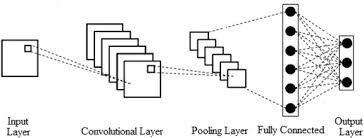

#Image classification with CNN


#1. Load and Prepare the Data
The MNIST Handwritten Digit Recognition Dataset contains 60,000 training and 10,000 testing labelled handwritten digit pictures. Each picture is 28 pixels in height and 28 pixels wide, for a total of 784 (28×28) pixels. Each pixel has a single pixel value associated with it.

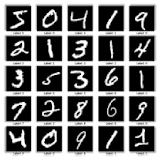

#1. Importing Libraries:


In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# tensorflow and its keras module are used to build and train the neural network.
# matplotlib.pyplot is used for plotting images.
# numpy is used for numerical operations.

#2. Loading the MNIST Dataset:
The MNIST dataset is loaded, which is split into training and test sets. X_train and X_test contain the images, while y_train and y_test contain the corresponding labels.

In [22]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


#3. Normalizing the Images:

The pixel values of the images are normalized to the

range [0, 1] by dividing by 255. This helps in faster convergence during training.

The images in the MNIST dataset are grayscale images with pixel values ranging from 0 to 255.

Each pixel value represents the intensity of the pixel, where 0 is black, and 255 is white.

Normalization is a process of scaling the pixel values to a specific range, usually [0, 1].


# Why 255.0?
The maximum possible value for a pixel in an 8-bit image is 255.

By dividing each pixel value by 255.0, we transform the range of pixel values from [0, 255] to [0, 1].

In [12]:
X_train, X_test = X_train / 255.0, X_test / 255.0


X_train and X_test are the training and test datasets, respectively, containing the pixel values of the images.

Each pixel value in X_train and X_test is divided by 255.0.

This converts the pixel values from the range [0, 255] to the range [0, 1].

#4. Reshaping the Data:
The images are reshaped to include a channel dimension,

changing the shape from (28, 28) to (28, 28, 1) for compatibility with the CNN layers.

**Original Shape of MNIST Data:**

The MNIST dataset consists of grayscale images of handwritten digits, each of size 28x28 pixels.

When initially loaded, X_train and X_test are NumPy arrays with shapes (60000, 28, 28) and (10000, 28, 28)
respectively, where:

60000 and 10000 are the number of images in the training and test sets.
28, 28 are the height and width of each image.

**Grayscale** **images**, a kind of black-and-white or gray monochrome, are composed exclusively of shades of gray.

X_train.shape[0] extracts the first dimension (number of images) from the shape of X_train.


In [13]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))


X_train.shape[0] and X_test.shape[0] represent the number of images in the training and test datasets, respectively.

The reshape method is used to add a channel dimension to the data.

After reshaping:

X_train will have the shape (60000, 28, 28, 1).

X_test will have the shape (10000, 28, 28, 1).

**Explanation of Dimensions:**

**(60000, 28, 28, 1):**

60000: Number of training images.

28: Height of each image.

28: Width of each image.

1: Number of channels (grayscale).

**(10000, 28, 28, 1):**

10000: Number of test images.

28: Height of each image.

28: Width of each image.

1: Number of channels (grayscale).


#5. Defining the CNN Model:


The CNN model is defined using a Sequential model.

It includes:
Three convolutional layers (Conv2D) with ReLU activation
and different filter sizes (32, 64).

Max pooling layers (MaxPooling2D) to reduce the spatial dimensions.

A flatten layer (Flatten) to convert the 2D output to 1D.

Two dense layers (Dense), the last one with a softmax
activation to output probabilities for the 10 digit classes.



In [14]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


**Conv2D(32, (3, 3), activation='relu'):** A 2D convolutional layer with 32 filters, each of size 3x3.

**input_shape=(28, 28, 1):** Specifies the input shape of the data. Here, each input image is 28x28 pixels with 1 channel (grayscale).

**activation='relu':** Uses the ReLU activation function to introduce non-linearity.

**MaxPooling2D((2, 2)):** A max pooling layer with a 2x2 pool size. It reduces the spatial dimensions (height and width) of the input by taking the maximum value in each 2x2 block.

**Conv2D(64, (3, 3), activation='relu'):** A 2D convolutional layer with 64 filters, each of size 3x3.

**Flatten():** Flattens the 3D output from the convolutional layers into a 1D vector.

This is necessary before feeding the data into the dense (fully connected) layers.

**Dense(64, activation='relu'):** A fully connected layer with 64 neurons and ReLU activation.

**Dense(10, activation='softmax'):** The output layer with 10 neurons (one for each class of digits 0-9).

The softmax activation function converts the output to a probability distribution over the 10 classes.

In [23]:
# Input Layer: Takes input images of shape (28, 28, 1).
# Convolutional Layers: Three convolutional layers with increasing filter sizes (32, 64, 64) to learn local patterns.
# MaxPooling Layers: Two max pooling layers to reduce the spatial dimensions and computational complexity.
# Flatten Layer: Converts the 3D feature maps to a 1D vector.
# Fully Connected Layers: One dense layer with 64 neurons to learn high-level features.
# Output Layer: A dense layer with 10 neurons and softmax activation to classify the input images into 10 classes.

#6. Compiling the Model:
The model is compiled with:

adam optimizer for training.
sparse_categorical_crossentropy loss function suitable for integer labels.

Accuracy as the evaluation metric.

In [25]:
# Optimizer: 'adam' is the optimizer that adjusts the learning rate dynamically based on gradient magnitudes.
# Loss Function: 'sparse_categorical_crossentropy' is suitable for multi-class classification where labels are integers.
# Metrics: ['accuracy'] specifies that accuracy should be monitored during training and evaluation.

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


#7. Training the Model:


The model is trained for 5 epochs using the training

data. Validation on the test data is performed after each epoch.


**Epochs**

epochs=5: An epoch is one complete pass through the entire training dataset. Training a model for multiple epochs allows it to learn from the data multiple times. In your case, the model will iterate over the entire X_train and y_train dataset 5 times during training.

**validation_data=(X_test, y_test):** This specifies the validation dataset on which the model will be evaluated after each epoch of training.

It helps monitor the model's performance on data that it hasn't seen during training to check for overfitting.

**Training Process:**

**During each epoch, the model will:**
Iterate over batches of the training data (X_train, y_train).

Compute the loss function sparse_categorical_crossentropy) and other metrics (like accuracy) on the training data.

Use the optimizer (adam) to adjust the weights of the model based on the gradients computed during backpropagation.

Evaluate the model on the validation data (X_test, y_test)
after each epoch to monitor its performance on unseen data.

In [17]:
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


Epoch 1/5
1875/1875 [==============================] - 65s 34ms/step - loss: 0.1421 - accuracy: 0.9558 - val_loss: 0.0597 - val_accuracy: 0.9802
Epoch 2/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0466 - accuracy: 0.9862 - val_loss: 0.0672 - val_accuracy: 0.9774
Epoch 3/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0331 - accuracy: 0.9897 - val_loss: 0.0270 - val_accuracy: 0.9912
Epoch 4/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0243 - accuracy: 0.9924 - val_loss: 0.0248 - val_accuracy: 0.9924
Epoch 5/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0180 - accuracy: 0.9941 - val_loss: 0.0422 - val_accuracy: 0.9881


#8. Evaluating the Model:


The model is evaluated on the test set, and the test accuracy is printed.


**After training the model (model.fit())**, you use model.evaluate() to get the final performance metrics on unseen data (test set).

**test_loss** gives you insight into how well the model generalizes to new, unseen data. Lower values indicate better performance.



**test_acc** provides the accuracy of the model on the test set, which is the percentage of correctly predicted labels.

In [18]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')


313/313 - 3s - loss: 0.0422 - accuracy: 0.9881 - 3s/epoch - 8ms/step
Test accuracy: 0.988099992275238


#9. Making Predictions:


Predictions are made on the test set. The output is an array of probabilities for each class.


**model.predict(X_test)**
 is used to obtain predictions from a trained model (model) on new data (X_test).

In [19]:
predictions = model.predict(X_test)


313/313 [==============================] - 3s 10ms/step


#10. Plotting Image Predictions:
Explanation:

**plt.xticks([]), plt.yticks([]), plt.grid(False):** They disable x-axis and y-axis ticks and grid lines for each subplot.

**color = 'blue' if np.argmax(predictions[i]) == labels[i] else 'red':** This line directly assigns the color based on whether the predicted label matches the true label.

**plt.xlabel(f"{np.argmax(predictions[i])} ({labels[i]})", color=color):**
This sets the x-axis label using an f-string to display the predicted label and true label, with the color determined by the color variable.

In [28]:
def plot_image_predictions(images, labels, predictions, num_images=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xticks([]), plt.yticks([]), plt.grid(False)
        color = 'blue' if np.argmax(predictions[i]) == labels[i] else 'red'
        plt.xlabel(f"{np.argmax(predictions[i])} ({labels[i]})", color=color)
    plt.show()


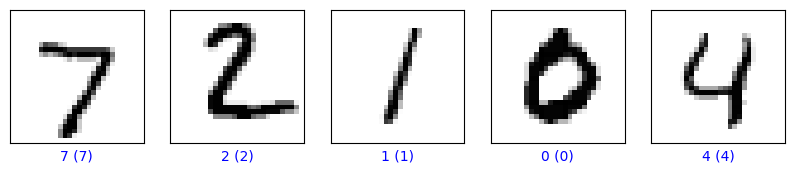

In [30]:
plot_image_predictions(X_test.reshape(-1, 28, 28), y_test, predictions, num_images=5)
#In the context of reshaping image data for machine learning models, -1 often represents the batch size or the number of samples, allowing flexibility in handling varying dataset sizes


The above steps collectively build, train, and evaluate a CNN for digit classification, visualize the results, and assess the model's performance on the MNIST dataset.